In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
import pandas as pd
from textblob import TextBlob

In [ ]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data science/machine learning/csv datasets/sentiment.csv")

In [ ]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
df.iloc[0,0]

'Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)'

In [ ]:
df.iloc[6,4]

'very good product'

In [ ]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


In [ ]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [ ]:
df.shape

(205052, 6)

In [ ]:
df[df['Summary'].isnull() & df['Review'].isnull()]

,product_name,product_price,Rate,Review,Summary,Sentiment
47616,Men Casual Brown Artificial Leather Money Clip...,159,5,NaN,NaN,positive
50559,Men Cargos,499,2,NaN,NaN,neutral


In [ ]:
df.dropna(subset=['Summary'],inplace=True)

In [ ]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24662
Summary              0
Sentiment            0
dtype: int64

In [ ]:
x=df["product_name"].nunique()
print("No.of products:",x)

No.of products: 958


In [ ]:
print("Product names:")
for product in df["product_name"].unique():
    print(product)

Product names:
Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)
Candes 60 L Room/Personal Air Cooler??????(White, Black, CRETA)
MAHARAJA WHITELINE 65 L Desert Air Cooler??????(White, Grey, Rambo Grey / AC-303)
Crompton 75 L Desert Air Cooler??????(White, Teal, ACGC-DAC751)
boAt Rockerz 510 Super Extra Bass Bluetooth Headset??????(Molten Orange, On the Ear)
Aroma NB119 Titanium - 48 Hours Playtime Bluetooth Neckband Bluetooth Headset??????(Green, In the Ear)
OnePlus Bullets Wireless Z2 with Fast Charge, 30 Hrs Battery Life, Earphones with mic Bluetooth Headset??????(Magico Black, In the Ear)
OnePlus Bullets Wireless Z2 Bluetooth Headset??????(Acoustic Red, In the Ear)
Mivi Roam2 5 W Bluetooth Speaker??????(Black, Mono Channel)
etmax NANO BLACK 30 W Bluetooth Home Theatre??????(Black, Stereo Channel)
Mivi Fort S16 Soundbar with 2 full range drivers, Made in India 16 W Bluetooth Soundbar??????(Black, 2.0 Channel)
I K

In [ ]:
x=df.loc[df["product_name"]=="BAJAJ 17 L Solo Microwave Oven1701MT White"]
print(x.to_string())

                                      product_name product_price Rate                                                          Review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Summary Sentiment
193367  BAJAJ 17 L Solo Microwave Oven1701MT White          4498    4                                                    nice product                  awesome microwave within a perfect pricei am using it for last 13 days and i must say thatthis is working perfectly goodmy only advice to all of you specially who were going to use the microwave for the 1 st timethat st

In [ ]:
x=df.loc[df["product_name"]=="SAMSUNG 28 L Convection Microwave OvenMC28A5025VP Black with Pattern"]
print(x.to_string())

                                                                product_name product_price Rate                 Review                                                                                                                                                                                               Summary Sentiment
192673  SAMSUNG 28 L Convection Microwave OvenMC28A5025VP Black with Pattern         14190    5              excellent                                                                                  its a very good product with almost all useful features its safe to use also even my 15 years daughter can handle it  positive
192674  SAMSUNG 28 L Convection Microwave OvenMC28A5025VP Black with Pattern         14190    4              very good                                                                                                                                                       good oven nice auto cook menu fast and reliable  positive
192675  SAMSUNG 28 

In [ ]:
df=df.rename(columns={"Rate":"rating"})

In [ ]:
print(df.columns)

Index(['product_name', 'product_price', 'rating', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')


In [ ]:
df.duplicated().value_counts()

False    170667
True      34374
dtype: int64

In [ ]:
df[df.duplicated(keep='first')].iloc[0]

product_name     MAHARAJA WHITELINE 65 L Desert Air Cooler?????...
product_price                                                 7999
rating                                                           4
Review                                                 really nice
Summary                                               good product
Sentiment                                                 positive
Name: 150, dtype: object

In [ ]:
df[df.duplicated(keep='last')].iloc[0]

product_name     MAHARAJA WHITELINE 65 L Desert Air Cooler?????...
product_price                                                 7999
rating                                                           5
Review                                          highly recommended
Summary                                                    awesome
Sentiment                                                 positive
Name: 92, dtype: object

In [ ]:
comp = df.iloc[150]
res = df.eq(comp)
df[res.all(axis = 1)]

,product_name,product_price,rating,Review,Summary,Sentiment
136,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,4,really nice,good product,positive
150,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,4,really nice,good product,positive


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().value_counts()

False    170667
dtype: int64

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [ ]:
pd.unique(df['rating'])

array([ 5.,  3.,  1.,  4.,  2., nan])

In [ ]:
df[df['rating'].isna()]

,product_name,product_price,rating,Review,Summary,Sentiment
17299,"Pigeon Favourite Electric Kettle??????(1.5 L, ...",pigeon favourite electric kettle15 l silver black,NaN,"pigeon favourite electric kettle??????(1.5 l, ...",pigeon favourite electric kettle15 l silver black,positive
175895,Bajaj DX 2 LW Dry Iron,Bajaj DX 2 LW Dry Iron,NaN,bajaj dx 2 l/w dry iron,bajaj dx 2 lw dry iron,negative
175906,Nova Plus Amaze NI 10 1100 W Dry IronGrey Tur...,Nova Plus Amaze NI 10 1100 W Dry IronGrey Tur...,NaN,nova plus amaze ni 10 1100 w dry iron?ãâ¿?ãâ...,nova plus amaze ni 10 1100 w dry irongrey turq...,positive


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(154464, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154464 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_name   154464 non-null  object 
 1   product_price  154464 non-null  object 
 2   rating         154464 non-null  float64
 3   Review         154464 non-null  object 
 4   Summary        154464 non-null  object 
 5   Sentiment      154464 non-null  object 
dtypes: float64(1), object(5)
memory usage: 8.2+ MB


In [ ]:
# Convert 'product_price' and 'rating' columns to integer data types
df['product_price'] = df['product_price'].astype(int)
df['rating'] = df['rating'].astype(int)

# Check the data types after conversion
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 154464 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   154464 non-null  object
 1   product_price  154464 non-null  int64 
 2   rating         154464 non-null  int64 
 3   Review         154464 non-null  object
 4   Summary        154464 non-null  object
 5   Sentiment      154464 non-null  object
dtypes: int64(2), object(4)
memory usage: 8.2+ MB
None


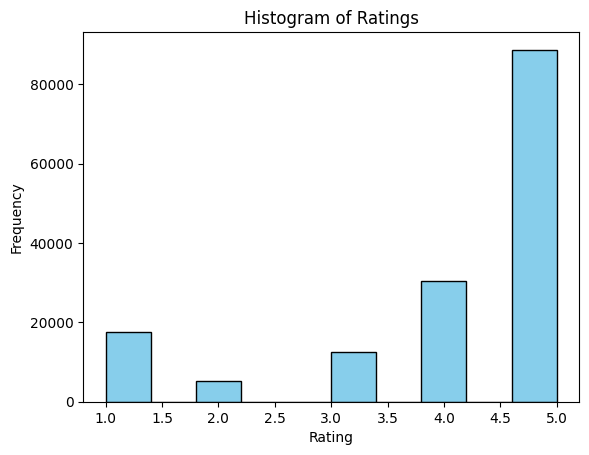

In [ ]:
plt.hist(df['rating'],  color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

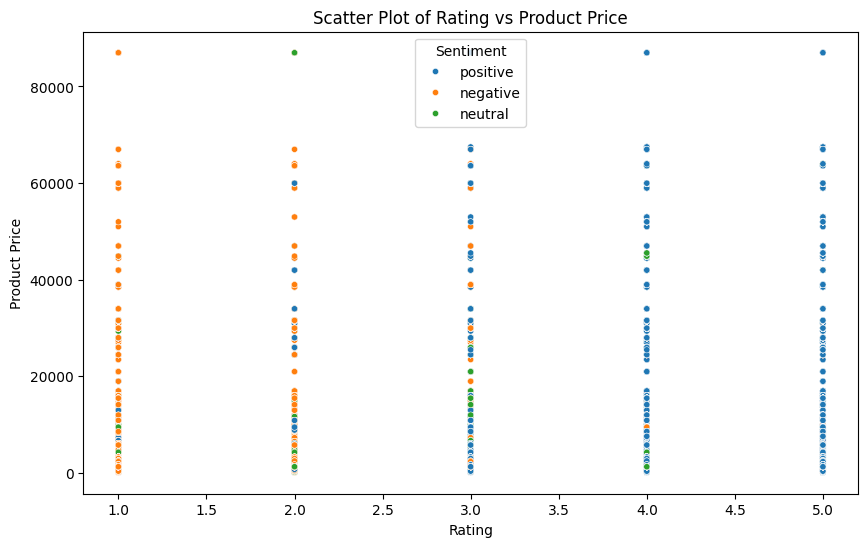

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='product_price', data=df, hue='Sentiment',s=20)
plt.title('Scatter Plot of Rating vs Product Price')
plt.xlabel('Rating')
plt.ylabel('Product Price')
plt.show()

In [ ]:
new = df.groupby('product_name')['rating'].mean()
dictionary = {name:str(i) for i, name in enumerate(new.index,1)}

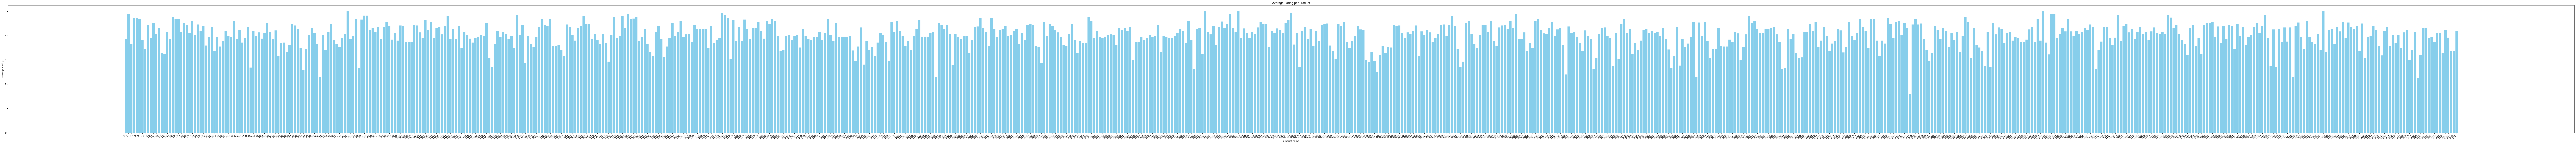

In [ ]:
plt.figure(figsize=(200, 10))
plt.bar(dictionary.values(), new.values, color='skyblue')
plt.title('Average Rating per Product')
plt.xlabel('product name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df['Review'] = df['Review'].apply(lambda x:re.sub('[^a-zA-Z\s]',' ',str(x)).strip())

In [ ]:
df['Summary'] = df['Summary'].apply(lambda x:re.sub('[^a-zA-Z\s]',' ',str(x)).strip())

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lem = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def conv(data):
  data = data.split()
  value = [lem.lemmatize(i,pos = 'v') for i in data if i not in set(stopwords.words('english'))]
  return ' '.join(value)
i = 5
print(df.Summary[i],'\n',conv(df.Summary[i]))

the cooler is really fantastic and provides good air flow highly recommended 
 cooler really fantastic provide good air flow highly recommend


In [ ]:
df['Summary'] = df['Summary'].apply(conv)

In [ ]:
pd.options.display.max_rows = 9999
print(df['Summary'])

0         great cooler excellent air flow price amaze un...
1                          best budget fit cooler nice cool
2                             quality good power air decent
3                                           bad product fan
4                                             ok ok product
                                ...                        
205045                                good quality products
205046                                   beautiful set nice
205049                                   nice fast delivery
205050                                      awesome product
205051    good mix bowl include one disappointmentand so...
Name: Summary, Length: 154464, dtype: object


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def sentiment_analysis(text):
  scores = analyzer.polarity_scores(text)
  compound_score = scores["compound"]

  if compound_score >= 0.05:
    return "positive"
  elif compound_score <= -0.05:
    return "negative"
  else:
    return "neutral"
reviews = df["Summary"]
sentiment_labels = [sentiment_analysis(review) for review in reviews]
df["sentiment_2"] = sentiment_labels


In [ ]:
df['Sentiment'].value_counts()

positive    122806
negative     23352
neutral       8306
Name: Sentiment, dtype: int64

In [ ]:
pd.options.display.max_rows = 99999
pd.options.display.max_colwidth = None
df[df['sentiment_2']=='neutral']['Summary'][0:5]

15                                                    awsm
24                                                   goodd
77     time delivery receive exact productthank u flipkart
78                                         maharaja always
102                                             valu money
Name: Summary, dtype: object

In [ ]:
new = df.groupby('product_name')

positive    8
negative    2
Name: sentiment_2, dtype: int64

In [ ]:
i = 5
cols = df['product_name'].unique()
name = cols[i]
new.get_group(name)['sentiment_2'].value_counts()

positive    233
negative     30
neutral      30
Name: sentiment_2, dtype: int64

In [ ]:
import pickle
pickle.dump(df.to_dict(),open('product.pkl','wb'))

In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['Review'] ).toarray()

10  100  10k  10mins  11  11th  12  150  1599  15k  17  1701mt  18  1832  20  200  2000  2021  20w  23  24  24th  25  2k  30  300  300mbps  30th  360  3g  3rd  46  4k  50  500  5k  60  600  615  61k  63k  678  7000  75  7l  8000  9838797786  a1  about  above  absolute  absolutely  ac  acceptable  achcha  act  advisable  affordable  after  aftersale  agaro  ah  ahead  air  alam  all  allergy  allused  almost  also  alternative  always  am  amazing  amazingly  among  amount  amp  amplifier  an  and  another  any  ap  app  appears  apple  appliance  applicance  applied  appropriate  aqi  aqua  are  areas  around  as  ask  assemble  assembled  assistant  at  audio  aura  auto  automatically  av  avaiable  availability  available  average  avg  away  awesome  awesomenice  awesomevery  awesomeð  awsm  awsome  awwwwwwwwsome  b4  back  backup  bad  badly  bag  bahut  bajaj  bakcup  bakwas  balanced  ball  bank  bar  base  basic  bass  battery  bcoz  be  beast  beautiful  because  been  beginne